In [1]:
#From SAV To LOVE

# HW №3



 ### **Задача №  1.** Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора)  на датасет from sklearn.datasets import load_boston. 




In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas as pd
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad
from tensorflow import keras
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse, r2_score as r2
import seaborn as sns
from pprint import pprint

In [3]:
def evaluate_preds(true_values, pred_values, save=False, vis=True):
    """Оценка качества модели и график preds vs true"""
    if vis:
        print("R2:\t" + str(np.round(r2(true_values, pred_values), 5)) + "\n" +
              "RMSE:\t" + str(np.round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
              "MSE:\t" + str(np.round(mse(true_values, pred_values), 3)))
        
        plt.figure(figsize=(8,8))
        
        sns.scatterplot(x=pred_values, y=true_values)
        plt.plot([0, np.max(pred_values)], [0, np.max(true_values)], linestyle='--', color='black')  # диагональ, где true_values = pred_values
        
        plt.xlabel('Predicted values')
        plt.ylabel('True values')
        plt.title('True vs Predicted values')
        
        if save == True:
            plt.savefig(REPORTS_FILE_PATH + 'report.png')
        plt.show()

    return np.round(r2(true_values, pred_values), 5), np.round(np.sqrt(mse(true_values, pred_values)), 3), np.round(mse(true_values, pred_values), 3)

In [4]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
X_train.shape

(339, 13)

In [6]:
y_test.shape

(167,)

## Базовая реализация

In [7]:
model_test = models.Sequential()
model_test.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_test.add(layers.Dense(64, activation='relu'))
model_test.add(layers.Dense(1))

In [8]:
model_test.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [9]:
model_test.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error'])

hist1=model_test.fit(X_train, y_train, epochs=5)

Epoch 1/5
11/11 [==============================] - 1s 3ms/step - loss: 2155.9888 - mean_absolute_error: 40.4186
Epoch 2/5
11/11 [==============================] - 0s 3ms/step - loss: 392.9555 - mean_absolute_error: 16.5051
Epoch 3/5
11/11 [==============================] - 0s 3ms/step - loss: 199.7044 - mean_absolute_error: 11.3819
Epoch 4/5
11/11 [==============================] - 0s 3ms/step - loss: 110.6596 - mean_absolute_error: 8.9165
Epoch 5/5
11/11 [==============================] - 0s 3ms/step - loss: 89.3631 - mean_absolute_error: 6.3959


In [10]:
y_pred_test = model_test.predict(X_test)
y_pred_test.shape

(167, 1)

In [11]:
y_test.shape

(167,)

R2:	0.2094
RMSE:	7.735
MSE:	59.831


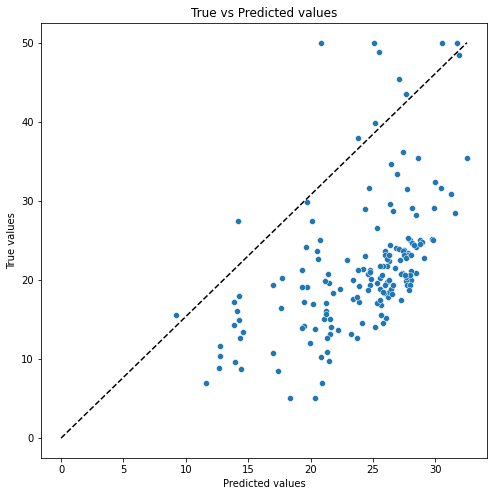

(0.2094, 7.735, 59.831)

In [12]:
evaluate_preds(y_test, y_pred_test.copy().flatten() )

### Изменяем количество нейронов, слоёв и прочее

In [13]:
model_1 = models.Sequential()
model_1.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_1.add(layers.Dense(64, activation='relu'))
model_1.add(layers.Dense(1))

model_2 = models.Sequential()
model_2.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_2.add(layers.Dense(1))

model_3 = models.Sequential()
model_3.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(1))

model_4 = models.Sequential()
model_4.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(1))

In [14]:
l = [2, 1, 3, 5]
i = 0
res_list = []
for model in [model_1, model_2, model_3, model_4]:
  res = {}
  model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error'])
  model.fit(X_train, y_train, epochs=5,
              verbose = False)
  y_pred_test = model.predict(X_test)
  #r2, rmse, mse = evaluate_preds(y_test, y_pred_test.flatten(), vis=False)

  res['l'] = l[i]
  i += 1
  res['r2'] = round(r2(y_test, y_pred_test.copy().flatten()),5)
  res['rmse'] = round(np.sqrt(mse(y_test, y_pred_test.copy().flatten())),5)
  res['mse'] = round(mse(y_test, y_pred_test.copy().flatten()),5)
  res_list.append(res)


In [15]:
pprint(res_list)

[{'l': 2, 'mse': 58.32283, 'r2': 0.22933, 'rmse': 7.63694},
 {'l': 1, 'mse': 72.27869, 'r2': 0.04492, 'rmse': 8.50169},
 {'l': 3, 'mse': 45.85613, 'r2': 0.39407, 'rmse': 6.77172},
 {'l': 5, 'mse': 55.93142, 'r2': 0.26093, 'rmse': 7.47873}]


### **ВЫВОД:**
2 слоя Всегда Лучше чем 1 слой, но если слоев больше это не всегда хорошо, так например для  5 слоев  уже пошло ухудшение.

In [16]:
res_list = []

for n in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512,888,988,1000, 1024, 2048]:
  res = {}
  model_n = models.Sequential()
  model_n.add(layers.Dense(n, activation='relu', input_shape=(X_train.shape[1],)))
  model_n.add(layers.Dense(n, activation='relu'))
  model_n.add(layers.Dense(1))
  model_n.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error'])
  
  model_n.fit(X_train, y_train, epochs=5,
              verbose = False)
  y_pred_test = model_n.predict(X_test)

  #r2, rmse, mse = evaluate_preds(y_test, y_pred_test.flatten(), vis=False)
  res['n'] = n
  res['r2'] = round(r2(y_test, y_pred_test.copy().flatten()),5)
  res['rmse'] = round(np.sqrt(mse(y_test, y_pred_test.copy().flatten())),5)
  res['mse'] = round(mse(y_test, y_pred_test.copy().flatten()),5)

  res_list.append(res)


In [17]:
pprint(res_list)

[{'mse': 541.75968, 'n': 1, 'r2': -6.1587, 'rmse': 23.27573},
 {'mse': 4484.71841, 'n': 2, 'r2': -58.26013, 'rmse': 66.96804},
 {'mse': 13727.09188, 'n': 4, 'r2': -180.38692, 'rmse': 117.16267},
 {'mse': 173.04459, 'n': 8, 'r2': -1.28658, 'rmse': 13.15464},
 {'mse': 773.02874, 'n': 16, 'r2': -9.21464, 'rmse': 27.80339},
 {'mse': 74.54582, 'n': 32, 'r2': 0.01497, 'rmse': 8.63399},
 {'mse': 40.84247, 'n': 64, 'r2': 0.46032, 'rmse': 6.39081},
 {'mse': 52.32207, 'n': 128, 'r2': 0.30863, 'rmse': 7.2334},
 {'mse': 54.96141, 'n': 256, 'r2': 0.27375, 'rmse': 7.4136},
 {'mse': 49.48254, 'n': 512, 'r2': 0.34615, 'rmse': 7.03438},
 {'mse': 76.96545, 'n': 888, 'r2': -0.01701, 'rmse': 8.773},
 {'mse': 56.47227, 'n': 988, 'r2': 0.25379, 'rmse': 7.5148},
 {'mse': 51.78313, 'n': 1000, 'r2': 0.31575, 'rmse': 7.19605},
 {'mse': 76.53996, 'n': 1024, 'r2': -0.01138, 'rmse': 8.74871},
 {'mse': 50.15967, 'n': 2048, 'r2': 0.3372, 'rmse': 7.08235}]


### **ВЫВОД:** 
При росте нейронов идет знаительное улучшение до определенных грнаниц, в данном случае до 1024 нейроНа - дальше пошло ухудшение.

  ###   **Задача № 2.** Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу  Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?


### Оптимизаторы

In [18]:
res_list = []

for opt in ['adam', 'RMSprop', 'Ftrl', 'Nadam', 'Adamax']:
  res = {}
  model_o = models.Sequential()
  model_o.add(layers.Dense(1024, activation='relu', input_shape=(X_train.shape[1],)))
  model_o.add(layers.Dense(1024, activation='relu'))
  model_o.add(layers.Dense(1))
  model_o.compile(optimizer=opt,
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error'])
 
  model_o.fit(X_train, y_train, epochs=5,
              verbose = False)
  y_pred_test = model_o.predict(X_test)

  #r2, rmse, mse = evaluate_preds(y_test, y_pred_test.flatten(), vis=False)
  #print(y_pred_test)

  res['o'] = opt
  res['r2'] = round(r2(y_test, y_pred_test.copy().flatten()),5)
  res['rmse'] = round(np.sqrt(mse(y_test, y_pred_test.copy().flatten())),5)
  res['mse'] = round(mse(y_test, y_pred_test.copy().flatten()),5)

  res_list.append(res)

In [19]:
pprint(res_list)

[{'mse': 51.1439, 'o': 'adam', 'r2': 0.3242, 'rmse': 7.1515},
 {'mse': 1227.1581, 'o': 'RMSprop', 'r2': -15.21541, 'rmse': 35.03082},
 {'mse': 54.76951, 'o': 'Ftrl', 'r2': 0.27629, 'rmse': 7.40064},
 {'mse': 248.79786, 'o': 'Nadam', 'r2': -2.28756, 'rmse': 15.77333},
 {'mse': 59.89874, 'o': 'Adamax', 'r2': 0.20851, 'rmse': 7.73943}]


### **ВЫВОД:** Адам  как правило всегда лучше - =он без рывков

### Проведем расширенное тестирование

 ### **Задача №  3.** Поработайте с документацией TensorFlow 2. Найти 2-3 полезные команды TensorFlow, не разобранные на уроке (полезные для Вас).

In [20]:
res_list = []

for opt in ['adam', 'RMSprop', 'Ftrl', 'Nadam', 'Adamax']:
  for n in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 888, 988, 1000, 1024, 2048]:
    for metrics in ['mean_absolute_error', 'mean_squared_error']:
      for loss in [tf.keras.losses.MeanSquaredError(), tf.keras.losses.MeanAbsoluteError()]:
        model_1 = models.Sequential()
        model_1.add(layers.Dense(n, activation='relu', input_shape=(X_train.shape[1],)))
        model_1.add(layers.Dense(n, activation='relu'))
        model_1.add(layers.Dense(1))

        model_2 = models.Sequential()
        model_2.add(layers.Dense(n, activation='relu', input_shape=(X_train.shape[1],)))
        model_2.add(layers.Dense(1))

        model_3 = models.Sequential()
        model_3.add(layers.Dense(n, activation='relu', input_shape=(X_train.shape[1],)))
        model_3.add(layers.Dense(n, activation='relu'))
        model_3.add(layers.Dense(n, activation='relu'))
        model_3.add(layers.Dense(n, activation='relu'))
        model_3.add(layers.Dense(n, activation='relu'))
        model_3.add(layers.Dense(1))

        model_4 = models.Sequential()
        model_4.add(layers.Dense(n, activation='relu', input_shape=(X_train.shape[1],)))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(1))

        l = [2, 1, 3, 5]
        i = 0

        for model in [model_1, model_2, model_3, model_4]:

          res = {}

          model.compile(optimizer='adam',
                      loss=loss,
                      metrics=metrics)
          
          model.fit(X_train, y_train, epochs=5,
                      verbose = False)
          y_pred_test = model.predict(X_test)

          #r2, rmse, mse = evaluate_preds(y_test, y_pred_test.flatten(), vis=False)


          res['l'] = l[i]
          res['n'] = n
          res['opt'] = opt
          res['metrics'] = metrics
          res['loss'] = loss
          i += 1
          res['r2'] = round(r2(y_test, y_pred_test.copy().flatten()),5)
          res['rmse'] = round(np.sqrt(mse(y_test, y_pred_test.copy().flatten())),5)
          res['mse'] = round(mse(y_test, y_pred_test.copy().flatten()),5)

          print(res)

          res_list.append(res)

{'l': 2, 'n': 1, 'opt': 'adam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x7fcff575da20>, 'r2': -6.15867, 'rmse': 23.27569, 'mse': 541.75783}
{'l': 1, 'n': 1, 'opt': 'adam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x7fcff575da20>, 'r2': -6.15866, 'rmse': 23.27567, 'mse': 541.75684}
{'l': 3, 'n': 1, 'opt': 'adam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x7fcff575da20>, 'r2': -6.15875, 'rmse': 23.27582, 'mse': 541.76357}
{'l': 5, 'n': 1, 'opt': 'adam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x7fcff575da20>, 'r2': -6.15866, 'rmse': 23.27567, 'mse': 541.75659}
{'l': 2, 'n': 1, 'opt': 'adam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x7fcff575d780>, 'r2': -1244.06905, 'rmse': 306.96086, 'ms

In [21]:
df = pd.DataFrame(res_list)

In [22]:
df.sort_values(by='r2', ascending=False).head(8)

,l,n,opt,metrics,loss,r2,rmse,mse
1181,1,1024,Adamax,mean_squared_error,<tensorflow.python.keras.losses.MeanAbsoluteEr...,0.50556,6.11705,37.41833
1084,2,128,Adamax,mean_squared_error,<tensorflow.python.keras.losses.MeanAbsoluteEr...,0.50118,6.14413,37.75031
909,1,988,Nadam,mean_squared_error,<tensorflow.python.keras.losses.MeanAbsoluteEr...,0.49250,6.19735,38.40718
233,1,2048,adam,mean_squared_error,<tensorflow.python.keras.losses.MeanSquaredErr...,0.49189,6.20102,38.45271
889,1,888,Nadam,mean_squared_error,<tensorflow.python.keras.losses.MeanSquaredErr...,0.48214,6.26027,39.19097
377,1,256,RMSprop,mean_squared_error,<tensorflow.python.keras.losses.MeanSquaredErr...,0.48056,6.26981,39.31057
397,1,512,RMSprop,mean_squared_error,<tensorflow.python.keras.losses.MeanAbsoluteEr...,0.47795,6.28552,39.50779
705,1,2048,Ftrl,mean_absolute_error,<tensorflow.python.keras.losses.MeanSquaredErr...,0.47657,6.29384,39.61241
697,1,1024,Ftrl,mean_squared_error,<tensorflow.python.keras.losses.MeanSquaredErr...,0.47516,6.30229,39.71886
917,1,1000,Nadam,mean_absolute_error,<tensorflow.python.keras.losses.MeanAbsoluteEr...,0.47466,6.30529,39.75670


### **ВЫВОД:**
**Разные комбинации дают разные компбинации по успеху**


## Проанализируем с учетом большего кол-ва Эпох c 5 до 10 :

In [24]:
res_list = []

for opt in ['adam', 'RMSprop', 'Ftrl', 'Nadam', 'Adamax']:
  for n in [1, 2, 4, 8, 888, 988, 1000, 1024]:
    for metrics in ['mean_absolute_error', 'mean_squared_error']:
      for loss in [tf.keras.losses.MeanSquaredError(), tf.keras.losses.MeanAbsoluteError()]:
        model_1 = models.Sequential()
        model_1.add(layers.Dense(n, activation='relu', input_shape=(X_train.shape[1],)))
        model_1.add(layers.Dense(n, activation='relu'))
        model_1.add(layers.Dense(1))

        model_2 = models.Sequential()
        model_2.add(layers.Dense(n, activation='relu', input_shape=(X_train.shape[1],)))
        model_2.add(layers.Dense(1))

        model_3 = models.Sequential()
        model_3.add(layers.Dense(n, activation='relu', input_shape=(X_train.shape[1],)))
        model_3.add(layers.Dense(n, activation='relu'))
        model_3.add(layers.Dense(n, activation='relu'))
        model_3.add(layers.Dense(n, activation='relu'))
        model_3.add(layers.Dense(n, activation='relu'))
        model_3.add(layers.Dense(1))

        model_4 = models.Sequential()
        model_4.add(layers.Dense(n, activation='relu', input_shape=(X_train.shape[1],)))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(1))

        l = [2, 1, 3, 5]
        i = 0

        for model in [model_1, model_2, model_3, model_4]:

          res = {}

          model.compile(optimizer='adam',
                      loss=loss,
                      metrics=metrics)
          
          model.fit(X_train, y_train, epochs=10,
                      verbose = False)
          y_pred_test = model.predict(X_test)

          #r2, rmse, mse = evaluate_preds(y_test, y_pred_test.flatten(), vis=False)


          res['l'] = l[i]
          res['n'] = n
          res['opt'] = opt
          res['metrics'] = metrics
          res['loss'] = loss
          i += 1
          res['r2'] = round(r2(y_test, y_pred_test.copy().flatten()),5)
          res['rmse'] = round(np.sqrt(mse(y_test, y_pred_test.copy().flatten())),5)
          res['mse'] = round(mse(y_test, y_pred_test.copy().flatten()),5)

          print(res)


{'l': 2, 'n': 1, 'opt': 'adam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x7fcff12b8ef0>, 'r2': -0.339, 'rmse': 10.06646, 'mse': 101.33371}
{'l': 1, 'n': 1, 'opt': 'adam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x7fcff12b8ef0>, 'r2': -9.91542, 'rmse': 28.74131, 'mse': 826.06272}
{'l': 3, 'n': 1, 'opt': 'adam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x7fcff12b8ef0>, 'r2': -6.12739, 'rmse': 23.22478, 'mse': 539.39037}
{'l': 5, 'n': 1, 'opt': 'adam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x7fcff12b8ef0>, 'r2': -6.12738, 'rmse': 23.22476, 'mse': 539.38963}
{'l': 2, 'n': 1, 'opt': 'adam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x7fcff12b84e0>, 'r2': -6.12725, 'rmse': 23.22454, 'mse': 53

# **Итоговый вывод увелечение кол-ва Эпох до опеределенного момента плодотворно влияет на результат.**

{'l': 1, 'n': 1024, 'opt': 'adam', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x7fcfebe53d30>, 'r2': 0.58272, 'rmse': 5.61951, 'mse': 31.57885}

{'l': 1, 'n': 888, 'opt': 'Adamax', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x7fcff5832278>, 'r2': 0.58265, 'rmse': 5.61999, 'mse': 31.58424}